# Imports

In [849]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime, timedelta

warnings.filterwarnings('ignore')

# Data processing

Sources:
- Dane Gov PL: https://dane.gov.pl/pl/dataset/2582,statystyki-zakazen-i-zgonow-z-powodu-covid-19-z-uw
- Our World In Data: https://github.com/owid/covid-19-data/tree/master/public/data
- Poland population: https://www.worldometers.info/world-population/poland-population/

In [850]:
infections = pd.read_csv("data/ewp_dsh_zakazenia_po_szczepieniu_20211214.csv", delimiter=";", encoding="ISO-8859-1")
deaths = pd.read_csv("data/ewp_dsh_zgony_po_szczep_20211214.csv", delimiter=";", encoding = "ISO-8859-1")
owid = pd.read_csv("data/owid-covid-data.csv")
demog = pd.read_excel("data/03_ludnosć_struktura wg wieku_RD'2020.xls", sheet_name=2, skiprows=12, 
                      nrows=121, header=None, usecols="A:D", names=["Age", "Total", "Males", "Females"])

POP = 37785892

In [851]:
infections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968818 entries, 0 to 1968817
Data columns (total 10 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   data_rap_zakazenia                 object 
 1   teryt_woj                          float64
 2   teryt_pow                          float64
 3   plec                               object 
 4   wiek                               float64
 5   kat_wiek                           object 
 6   producent                          object 
 7   dawka_ost                          object 
 8   obniz_odpornosc                    int64  
 9   liczba_zaraportowanych_zakazonych  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 150.2+ MB


In [852]:
deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58980 entries, 0 to 58979
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   data_rap_zgonu                 58980 non-null  object 
 1   teryt_woj                      58980 non-null  int64  
 2   teryt_pow                      58980 non-null  int64  
 3   plec                           58980 non-null  object 
 4   wiek                           58979 non-null  float64
 5   kat_wiek                       58980 non-null  object 
 6   czy_wspolistniejace            58980 non-null  int64  
 7   producent                      7668 non-null   object 
 8   dawka_ost                      7668 non-null   object 
 9   obniz_odpornosc                58980 non-null  int64  
 10  liczba_zaraportowanych_zgonow  58980 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 4.9+ MB


In [853]:
infections.head()

,data_rap_zakazenia,teryt_woj,teryt_pow,plec,wiek,kat_wiek,producent,dawka_ost,obniz_odpornosc,liczba_zaraportowanych_zakazonych
0,2021-12-13,2.0,201.0,K,4.0,0-18,NaN,NaN,0,1
1,2021-12-13,2.0,201.0,K,14.0,0-18,NaN,NaN,0,1
2,2021-12-13,2.0,201.0,K,21.0,19-24,NaN,NaN,0,1
3,2021-12-13,2.0,201.0,K,22.0,19-24,Johnson&Johnson,pelna_dawka,0,1
4,2021-12-13,2.0,201.0,K,22.0,19-24,NaN,NaN,0,1


In [854]:
deaths.head()

,data_rap_zgonu,teryt_woj,teryt_pow,plec,wiek,kat_wiek,czy_wspolistniejace,producent,dawka_ost,obniz_odpornosc,liczba_zaraportowanych_zgonow
0,2021-01-02,4,407,K,67.0,65-74,1,NaN,NaN,0,1
1,2021-01-02,4,407,K,90.0,85-94,1,NaN,NaN,0,1
2,2021-01-02,4,407,M,69.0,65-74,1,NaN,NaN,0,1
3,2021-01-02,4,415,M,72.0,65-74,1,NaN,NaN,0,1
4,2021-01-02,4,415,M,77.0,75-84,1,NaN,NaN,0,1


In [855]:
print(len(infections))
print(len(deaths))

1968818
58980


In [856]:
infections["dawka_ost"].value_counts()

pelna_dawka       330589
jedna_dawka        57391
przypominajaca      5479
uzupe³niaj¹ca       1049
Name: dawka_ost, dtype: int64

In [857]:
deaths["dawka_ost"].value_counts()

pelna_dawka       4283
jedna_dawka       3261
przypominajaca      88
uzupe³niaj¹ca       36
Name: dawka_ost, dtype: int64

In [858]:
infections["producent"].value_counts()

Pfizer             237274
Astra Zeneca        98957
Johnson&Johnson     35638
Moderna             22574
brak danych            83
Name: producent, dtype: int64

In [859]:
deaths["producent"].value_counts()

Pfizer             6423
Astra Zeneca        617
Moderna             387
Johnson&Johnson     241
Name: producent, dtype: int64

In [860]:
infections = infections.rename(
    {"data_rap_zakazenia": "data_rap", "liczba_zaraportowanych_zakazonych": "liczba"}, axis=1)
deaths = deaths.rename(
    {"data_rap_zgonu": "data_rap", "liczba_zaraportowanych_zgonow": "liczba"}, axis=1)

infections["data_rap"] = pd.to_datetime(infections["data_rap"])
deaths["data_rap"] = pd.to_datetime(deaths["data_rap"])

In [861]:
infections["data_rap"].describe()

count                 1968818
unique                    347
top       2021-11-30 00:00:00
freq                    22573
first     2021-01-01 00:00:00
last      2021-12-13 00:00:00
Name: data_rap, dtype: object

In [862]:
deaths["data_rap"].describe()

count                   58980
unique                    322
top       2021-04-07 00:00:00
freq                      927
first     2021-01-02 00:00:00
last      2021-12-13 00:00:00
Name: data_rap, dtype: object

In [863]:
infections['vaccinated'] = 1
infections['vaccinated'][(infections['dawka_ost'].isna()) | (infections['dawka_ost']=='jedna_dawka')] = 0

deaths['vaccinated'] = 1
deaths['vaccinated'][(deaths['dawka_ost'].isna()) | (deaths['dawka_ost']=='jedna_dawka')] = 0

### OWID data processing

In [864]:
owidpl = owid[owid["location"]=="Poland"].reset_index(drop=True)

In [865]:
vax_cols = ["people_vaccinated", "people_fully_vaccinated"]
vax_cols = ["date"] + vax_cols
owid_vax = owidpl[vax_cols]

In [866]:
owid_vax.tail()

,date,people_vaccinated,people_fully_vaccinated
651,2021-12-15,21247906.0,20756179.0
652,2021-12-16,21285199.0,20780909.0
653,2021-12-17,21331952.0,20814451.0
654,2021-12-18,21378003.0,20835654.0
655,2021-12-19,21387771.0,20841341.0


In [867]:
owid_vax["people_vaccinated"] = owid_vax["people_vaccinated"].fillna(method='ffill')
owid_vax["people_fully_vaccinated"] = owid_vax["people_fully_vaccinated"].fillna(method='ffill') \
                                                                         .fillna(0)

In [868]:
owid_vax["date"] = pd.to_datetime(owid_vax['date'])
owid_vax = owid_vax[owid_vax["date"].dt.year == 2021][:347].reset_index(drop=True)

In [869]:
owid_vax["date"].describe()

count                     347
unique                    347
top       2021-01-01 00:00:00
freq                        1
first     2021-01-01 00:00:00
last      2021-12-13 00:00:00
Name: date, dtype: object

In [870]:
owid_vax['people_1_dose'] = owid_vax["people_vaccinated"] - owid_vax["people_fully_vaccinated"]
owid_vax['people_unvaccinated'] = POP - owid_vax["people_vaccinated"]

### Demog data processing

In [872]:
demog.head()

,Age,Total,Males,Females
0,0–4 lata,1918464,985549,932915
1,0,366971,188537,178434
2,1,387747,199555,188192
3,2,404307,207521,196786
4,3,386131,198183,187948


In [873]:
mask = demog['Age'].str.contains("-").fillna(True)
demog = demog.loc[mask].reset_index(drop=True)

In [874]:
def age_category(x):
    x = int(x)
    if x < 19:
        return "0-18"
    elif x < 25:
        return "19-24"
    elif x < 35:
        return "25-34"
    elif x < 45:
        return "35-44"
    elif x < 55:
        return "45-54"
    elif x < 65:
        return "55-64"
    elif x < 75:
        return "65-74"
    elif x < 85:
        return "75-84"
    elif x < 95:
        return "85-94"
    else:
        return "95+"

demog['kat_wiek'] = demog["Age"].apply(age_category)
demog = demog.groupby("kat_wiek").sum().reset_index()

In [875]:
demog

,kat_wiek,Total,Males,Females
0,0-18,7314617,3754515,3560102
1,19-24,2404859,1228912,1175947
2,25-34,5426925,2756987,2669938
3,35-44,6263562,3164641,3098921
4,45-54,4866411,2429572,2436839
5,55-64,5159183,2463781,2695402
6,65-74,4217099,1843916,2373183
7,75-84,1917799,696152,1221647
8,85-94,759608,216992,542616
9,95+,46571,10291,36280


### Functions

In [876]:
last_case = infections["data_rap"].max()
month_to_replace = last_case.month - 1 if last_case.month > 1 else 12
DATE = last_case.replace(month=month_to_replace)

def get_vax_aggregates(df):
    vax = df[(df['dawka_ost']!="jedna_dawka") & (~df['dawka_ost'].isna())]
    vax_one = df[df['dawka_ost']=="jedna_dawka"]
    unvax = df[df['dawka_ost'].isna()]
    
    aggs = [vax, vax_one, unvax]
    names = ["Vaccinated", "1-Dose Vaccinated", "Unvaccinated"]
    for idx, agg in enumerate(aggs):
        aggs[idx] = agg["liczba"].groupby(df["data_rap"]).sum()
        aggs[idx].name = names[idx]

    return pd.DataFrame(aggs).fillna(0).transpose()

def normalize_by(df):
    df = df.copy()
    df["Vaccinated"] /= owid_vax.set_index("date")["people_fully_vaccinated"]
    df["1-Dose Vaccinated"] /= owid_vax.set_index("date")["people_1_dose"]
    df["Unvaccinated"] /= owid_vax.set_index("date")["people_unvaccinated"]

    df *= 100
    df = df.fillna(0)

    return df

def get_age_aggregates(df, date):
    lastm = df[df["data_rap"].dt.date >= pd.to_datetime(date)]

    vax_split = lastm["liczba"].groupby([lastm['kat_wiek'], lastm['vaccinated']]).sum()
    return vax_split.reset_index()

def get_stacked_age_aggregates(df, date):
    lastm = df[df["data_rap"].dt.date >= pd.to_datetime(date)]

    df_plot = lastm.groupby(['vaccinated', 'kat_wiek']).sum()['liczba'].reset_index() \
                   .pivot(columns='vaccinated', index='kat_wiek', values='liczba')

    return df_plot

def divide_by_age_group(x):
    demog_values = demog.set_index("kat_wiek")["Total"]
    pop = demog_values[x.name]
    return x / pop * 100

def get_stacked_illness_aggregates(df, date):
    lastm = df[df["data_rap"].dt.date >= pd.to_datetime(date)]

    df_plot = lastm.groupby(['czy_wspolistniejace', 'kat_wiek']).sum()['liczba'].reset_index() \
                   .pivot(columns='czy_wspolistniejace', index='kat_wiek', values='liczba')

    return df_plot

def get_daily_aggregates(df):
    return df.groupby("data_rap").sum()['liczba']

# Visualizations

### % of population vaccinated

[]

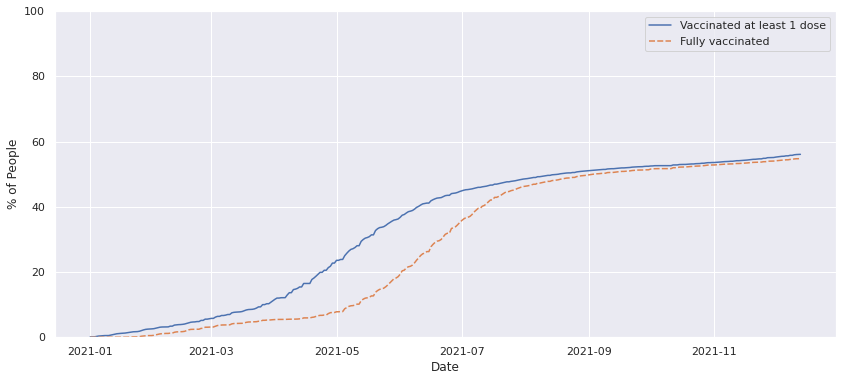

In [877]:
sns.set_theme()
pop_perc_vax = owid_vax[["people_vaccinated", "people_fully_vaccinated"]] / POP * 100
pop_perc_vax = pop_perc_vax.rename({"people_vaccinated": "Vaccinated at least 1 dose", 
                                    "people_fully_vaccinated": "Fully vaccinated"}, axis=1)

plt.figure(figsize=(14,6))
ax = sns.lineplot(data=pop_perc_vax.set_index(owid_vax["date"]))
ax.set(xlabel='Date', ylabel='% of People')
ax.set_ylim(0, 100)
plt.plot()

### Cases reported

[]

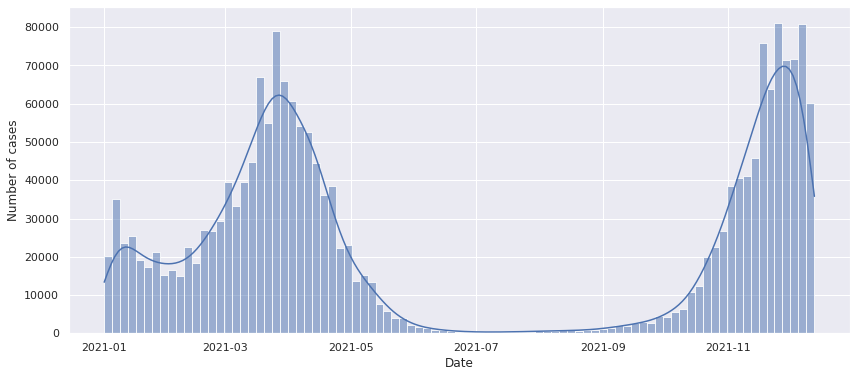

In [878]:
plt.figure(figsize=(14,6))
ax = sns.histplot(infections['data_rap'], kde=True)
ax.set(xlabel='Date', ylabel='Number of cases')
plt.plot()

### Deaths reported

[]

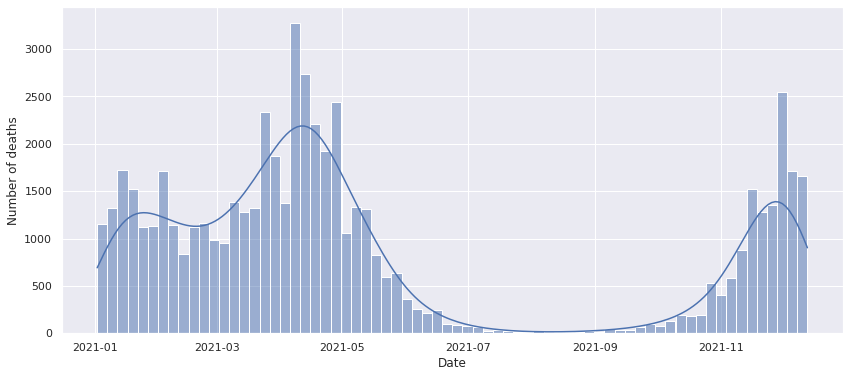

In [879]:
plt.figure(figsize=(14,6))
ax = sns.histplot(deaths['data_rap'], kde=True)
ax.set(xlabel='Date', ylabel='Number of deaths')
plt.plot()

### Cases reported by vaccination status 7-day moving average

[]

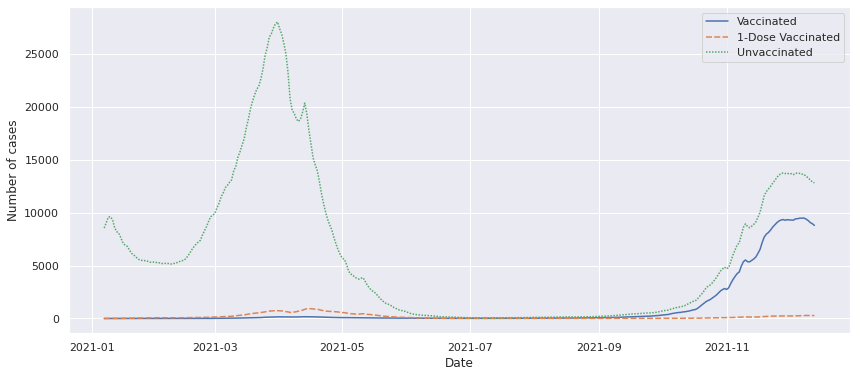

In [880]:
inf_aggby_vax = get_vax_aggregates(infections)
inf_ma7 = inf_aggby_vax.rolling(window=7).mean()
inf_ma7 = inf_ma7.dropna()

plt.figure(figsize=(14,6))
ax = sns.lineplot(data=inf_ma7)
ax.set(xlabel='Date', ylabel='Number of cases')
plt.plot()

### Cases reported by vaccination status 7-day moving average (normalized)

[]

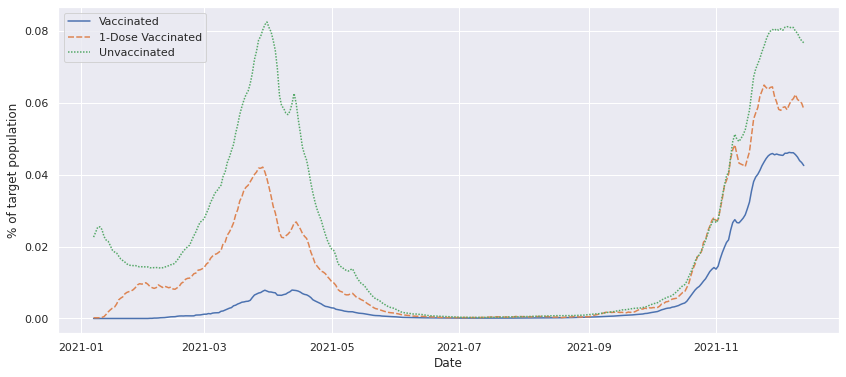

In [881]:
norm_aggbyvax = normalize_by(inf_aggby_vax)
inf_ma7 = norm_aggbyvax.rolling(window=7).mean()
inf_ma7 = inf_ma7.dropna()

plt.figure(figsize=(14,6))
ax = sns.lineplot(data=inf_ma7)
ax.set(xlabel='Date', ylabel='% of target population')
plt.plot()

### Deaths reported by vaccination status 7-day moving average

[]

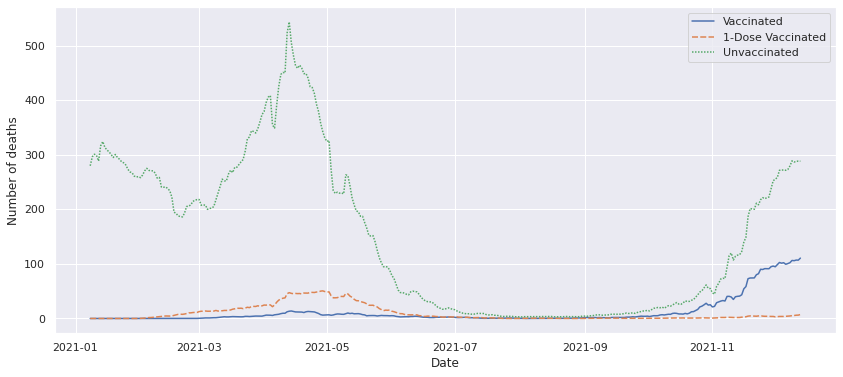

In [882]:
dt_aggby_vax = get_vax_aggregates(deaths)
inf_ma7 = dt_aggby_vax.rolling(window=7).mean()
inf_ma7 = inf_ma7.dropna()

plt.figure(figsize=(14,6))
ax = sns.lineplot(data=inf_ma7)
ax.set(xlabel='Date', ylabel='Number of deaths')
plt.plot()

### Deaths reported by vaccination status 7-day moving average (normalized)

[]

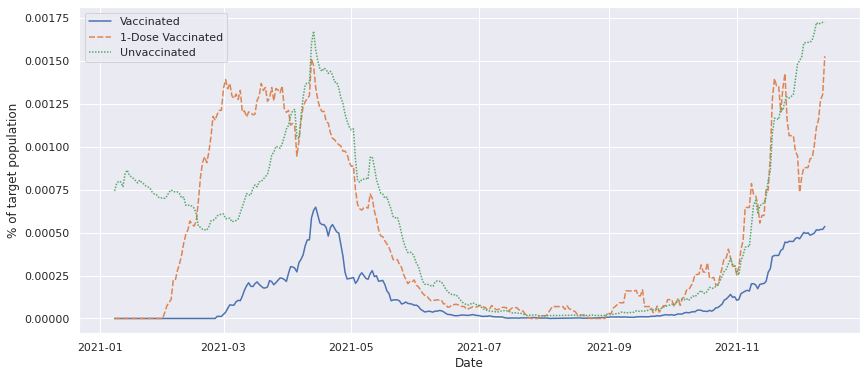

In [883]:
norm_aggbyvax = normalize_by(dt_aggby_vax)
inf_ma7 = norm_aggbyvax.rolling(window=7).mean()
inf_ma7 = inf_ma7.dropna()

plt.figure(figsize=(14,6))
ax = sns.lineplot(data=inf_ma7)
ax.set(xlabel='Date', ylabel='% of target population')
plt.plot()

### Cases by age group and vaccination status 13.11.2021 - 13.12.2021

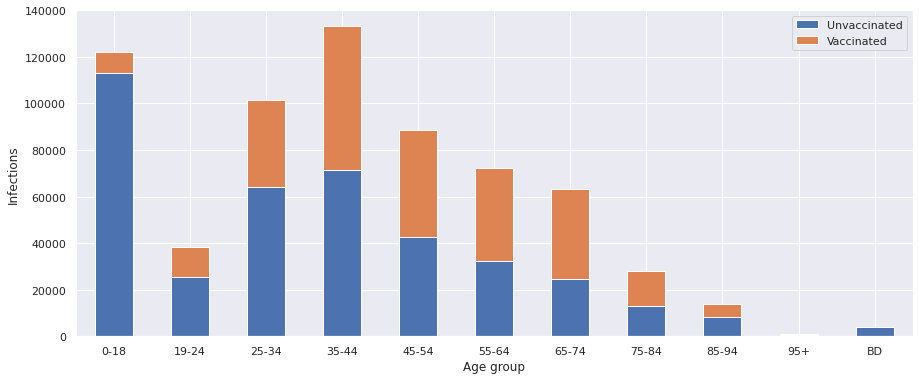

In [884]:
df_plot = get_stacked_age_aggregates(infections, DATE)

df_plot = df_plot.plot(kind='bar', figsize=(15,6), stacked=True, xlabel="Age group", 
                       ylabel="Infections", rot=0)

L = df_plot.legend()
L.get_texts()[0].set_text('Unvaccinated')
L.get_texts()[1].set_text('Vaccinated')

### Cases by age group and vaccination status 13.11.2021 - 13.12.2021 relative to population

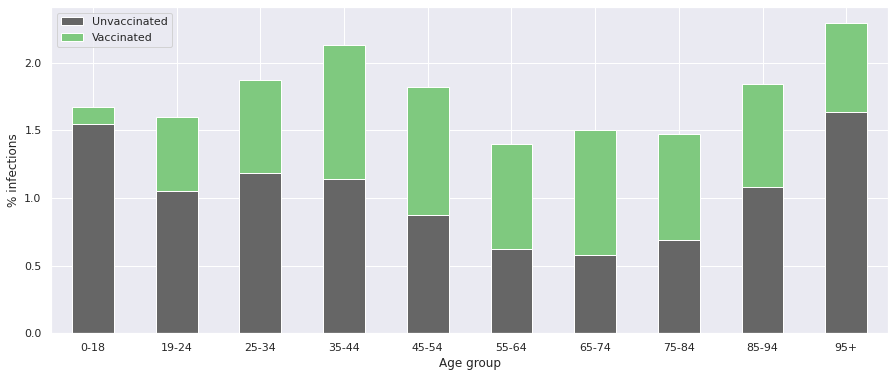

In [885]:
df_plot = get_stacked_age_aggregates(infections, DATE)

df_plot_norm = df_plot.drop("BD").apply(divide_by_age_group, axis=1)

df_plot = df_plot_norm.plot(kind='bar', figsize=(15,6), stacked=True, xlabel="Age group", 
                            ylabel="% infections", rot=0, colormap="Accent_r")

L = df_plot.legend()
L.get_texts()[0].set_text('Unvaccinated')
L.get_texts()[1].set_text('Vaccinated')

### Deaths by age group and vaccination status 13.11.2021 - 13.12.2021

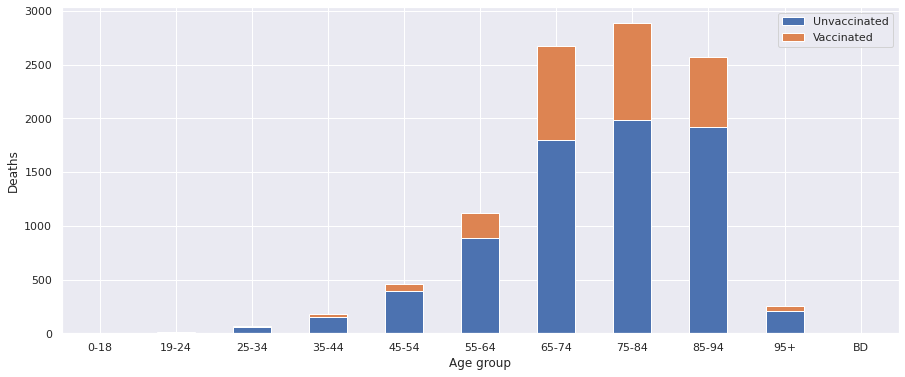

In [886]:
df_plot = get_stacked_age_aggregates(deaths, DATE)

df_plot = df_plot.plot(kind='bar', figsize=(15,6), stacked=True, xlabel="Age group", 
                       ylabel="Deaths", rot=0)

L = df_plot.legend()
L.get_texts()[0].set_text('Unvaccinated')
L.get_texts()[1].set_text('Vaccinated')

### Deaths by age group and vaccination status 13.11.2021 - 13.12.2021 relative to population

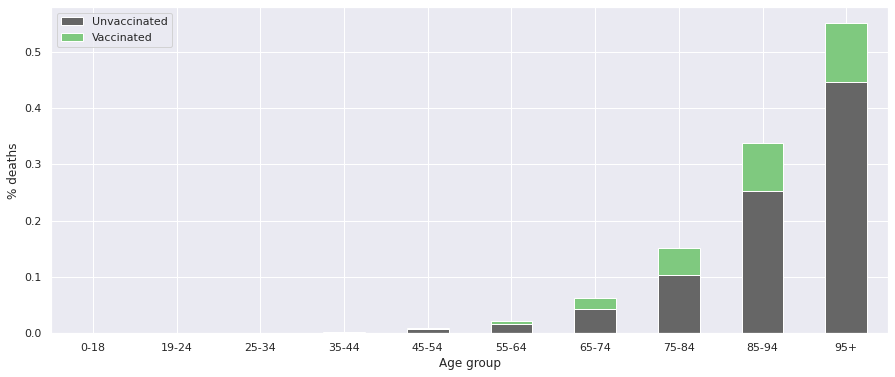

In [887]:
df_plot = get_stacked_age_aggregates(deaths, DATE)

df_plot_norm = df_plot.drop("BD").apply(divide_by_age_group, axis=1)

df_plot = df_plot_norm.plot(kind='bar', figsize=(15,6), stacked=True, xlabel="Age group", 
                            ylabel="% deaths", rot=0, colormap="Accent_r")

L = df_plot.legend()
L.get_texts()[0].set_text('Unvaccinated')
L.get_texts()[1].set_text('Vaccinated')

### Deaths by age group and vaccination status 13.11.2021 - 13.12.2021 filter out co-existing illnesses

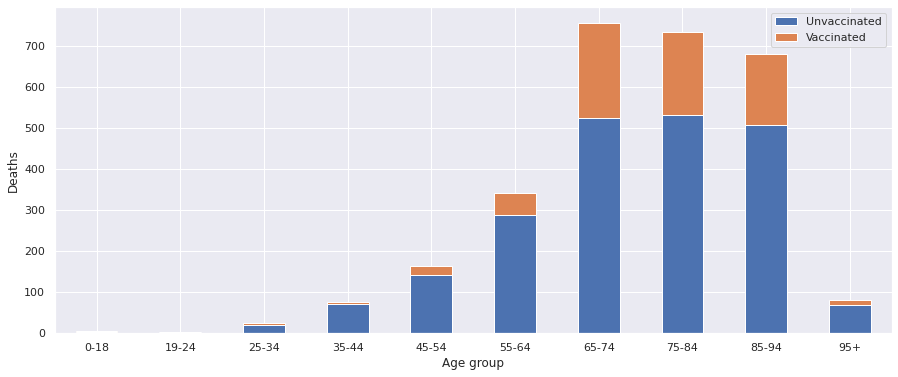

In [888]:
df_plot = get_stacked_age_aggregates(deaths[deaths["czy_wspolistniejace"]==0], DATE)

df_plot = df_plot.plot(kind='bar', figsize=(15,6), stacked=True, xlabel="Age group", 
                       ylabel="Deaths", rot=0)

L = df_plot.legend()
L.get_texts()[0].set_text('Unvaccinated')
L.get_texts()[1].set_text('Vaccinated')

### Deaths by age group and vaccination status 13.11.2021 - 13.12.2021 filter out co-existing illnesses relative

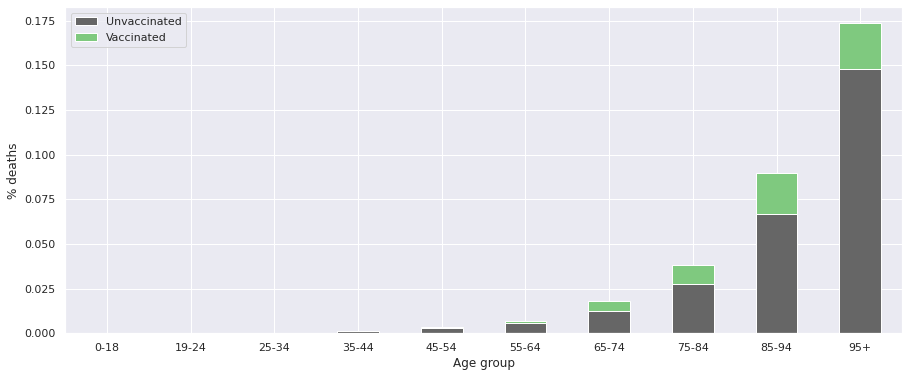

In [889]:
df_plot = get_stacked_age_aggregates(deaths[deaths["czy_wspolistniejace"]==0], DATE)

df_plot_norm = df_plot.apply(divide_by_age_group, axis=1)

df_plot = df_plot_norm.plot(kind='bar', figsize=(15,6), stacked=True, xlabel="Age group", 
                            ylabel="% deaths", rot=0, colormap="Accent_r")

L = df_plot.legend()
L.get_texts()[0].set_text('Unvaccinated')
L.get_texts()[1].set_text('Vaccinated')

### Deaths by co-occuring illness for unvaccinated people

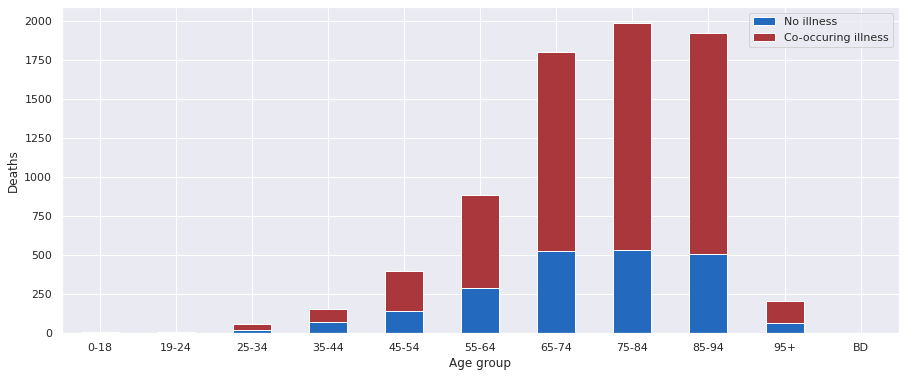

In [890]:
df_plot = get_stacked_illness_aggregates(deaths[deaths['vaccinated']==0], DATE)

df_plot = df_plot.plot(kind='bar', figsize=(15,6), stacked=True, xlabel="Age group", 
                       ylabel="Deaths", rot=0, colormap='vlag')

L = df_plot.legend()
L.get_texts()[0].set_text('No illness')
L.get_texts()[1].set_text('Co-occuring illness')

### Deaths by co-occuring illness for vaccinated people

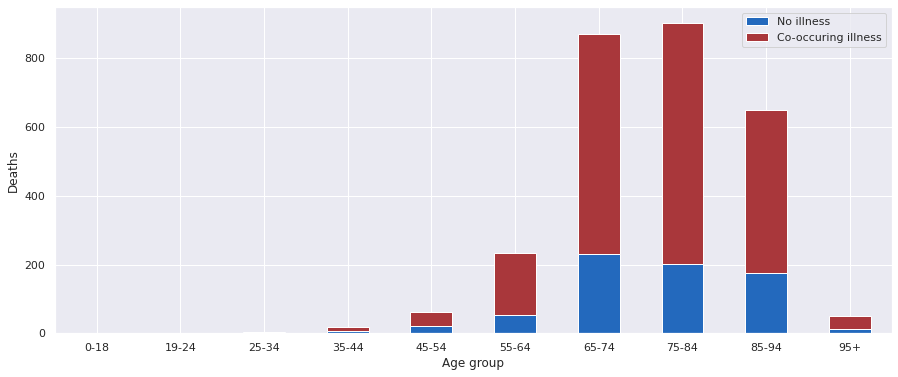

In [891]:
df_plot = get_stacked_illness_aggregates(deaths[deaths['vaccinated']==1], DATE)

df_plot = df_plot.plot(kind='bar', figsize=(15,6), stacked=True, xlabel="Age group", 
                       ylabel="Deaths", rot=0, colormap='vlag')

L = df_plot.legend()
L.get_texts()[0].set_text('No illness')
L.get_texts()[1].set_text('Co-occuring illness')

### Vaccine efficacy

In [893]:
# Attack rate of unvaccinated people
new_cases = get_daily_aggregates(infections[infections['vaccinated']==0])
at_risk = owid_vax.set_index('date')['people_unvaccinated']

aru = new_cases / at_risk

# Attack rate of vaccinated people
new_cases = get_daily_aggregates(infections[infections['vaccinated']==1])
at_risk = owid_vax.set_index('date')['people_fully_vaccinated']

arv = new_cases / at_risk

ve = (aru - arv) / aru * 100

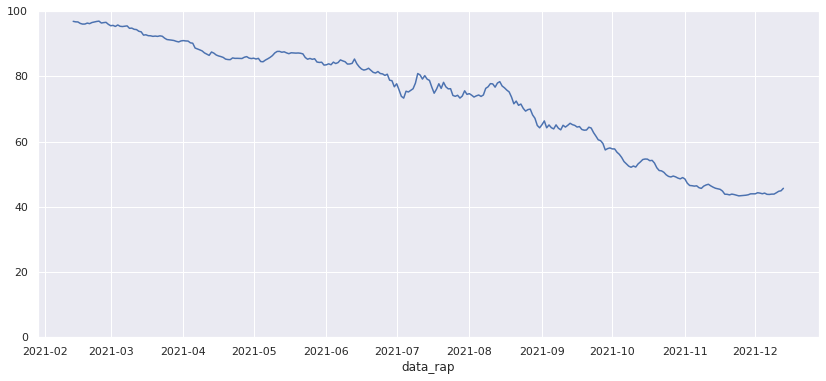

In [894]:
plt.figure(figsize=(14,6))
sns.lineplot(data=ve.rolling(window=7).mean().dropna())
plt.ylim(0,100)
plt.show()

### Case fatality rate

In [895]:
cfr = get_daily_aggregates(deaths).cumsum() / get_daily_aggregates(infections).cumsum() * 100

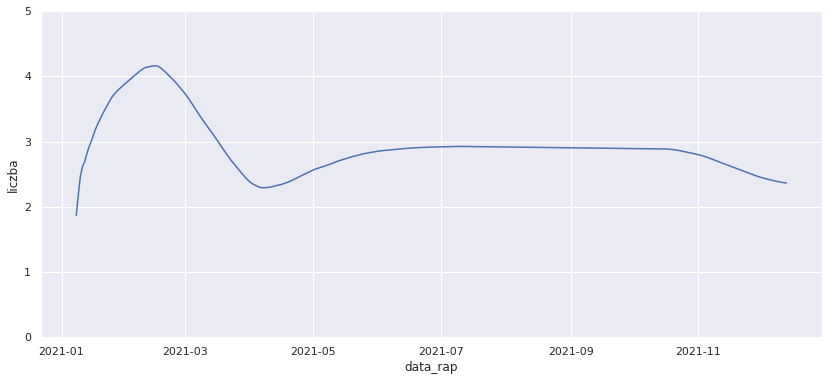

In [896]:
plt.figure(figsize=(14,6))
sns.lineplot(data=cfr.rolling(window=7).mean().dropna())
plt.ylim(0,5)
plt.show()